
# Image denoising by implementing a Low Pass Filter using FFT. #


Implements, via FFT *Fast Fourier Transform*, the following convolution:

\begin{align}f_1(t) = \int dt'\, K(t-t') f_0(t')\end{align}

\begin{align}\tilde{f}_1(\omega) = \tilde{K}(\omega) \tilde{f}_0(\omega)\end{align}


## Assignment ##

Enhance the following image by applying a Low Pass Filter:

moonlanding.png: <img src="files/moonlanding_filtered.png"  >

Only a FFT filtering over a 8 bit grey level image is needed.

Use for the assignment the 8 bits grey level image: moonlanding_256.png.

## Questions ##

In the notebook the FFT plots for four different images are shown.

--- Explain the differences between the FFT domain of each image.
1. The first image has black bars which repeat themselfs with a low freqeuncy in the horizontal direction. This corresponds to a sine-wave which propagates in the x-direction. Because of its direction all of the points in the fourier transform are on the x-axis and because of its relatively low frequency the points with the highest frequency are close to the center of the transform.
2. The second image propagates in both the x- and y-direction leading to the entire fourier transform image being filled. Its direction also leads the points with the highest amplitude to appear on the diagonal of the fourier transform.
3. The third image is the same as the first, but with a higher frequency. This leads to the spots in the fourier transform to be further away from eachother.
4. The fourth image has horizontal sports with a high amplitude which create the vertival bar and vertical spots for the horizontal bar. By having multiple spots the eventual sine waves will interfere with eachother causing the creation of a high contrast black on white cross.

--- Where are the highest frequencies plotted the frequency domain?
The higher frequencies are plotted at the points the furthest away from the center. This means that the highest frequencies are located in the four corners of the fourier transforms.

--- Why is the FFT shifted to the center of the plot?
Because the frequency image shows vectors corresponding to different sine-waves, these spots are normally calculated from (0,0). The imshow function only accepts positive values and otherwise loops the image back through the other side. Because of these facts, a normal FFT image would have all of their vectors not pointing to the upper-right quadrant be misplaced and thus the entire image must first be centered to be showed correct relative to eachother.

--- How works filtering in the FFT domain?
Filtering works by removing the amplitude from different spots in the fourier transform image and thus removing these frequencies from it. This can then be used to create the original image, but now without these frequencies in the specified directions.

## Documentation ##

An introduction to filtering images using FFT in the following clips:

https://www.youtube.com/watch?v=gwaYwRwY6PU

https://www.youtube.com/watch?v=xhO8iz2qCOE

The following document explains in short filtering using FFT:

<p><a href="./Docs/Filtering and FFT.pdf"> The 2D Fourier transform and image filtering </a></p>



### Compute the 2d FFT of the input image ###


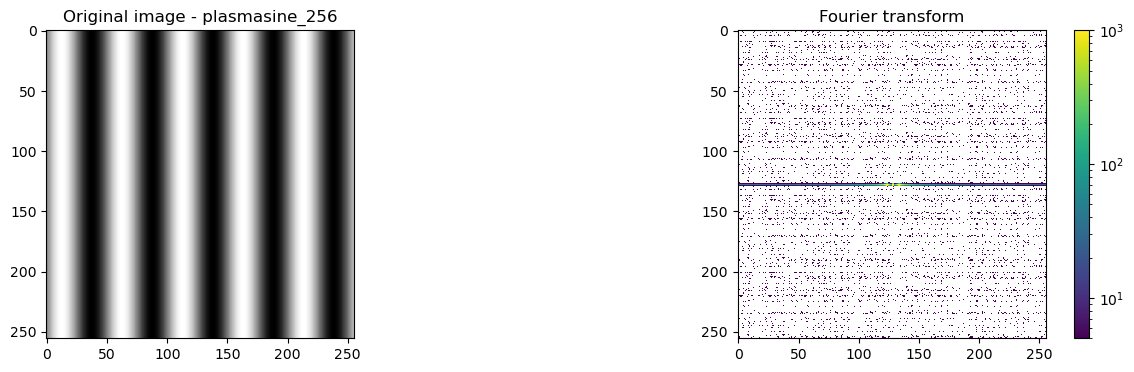

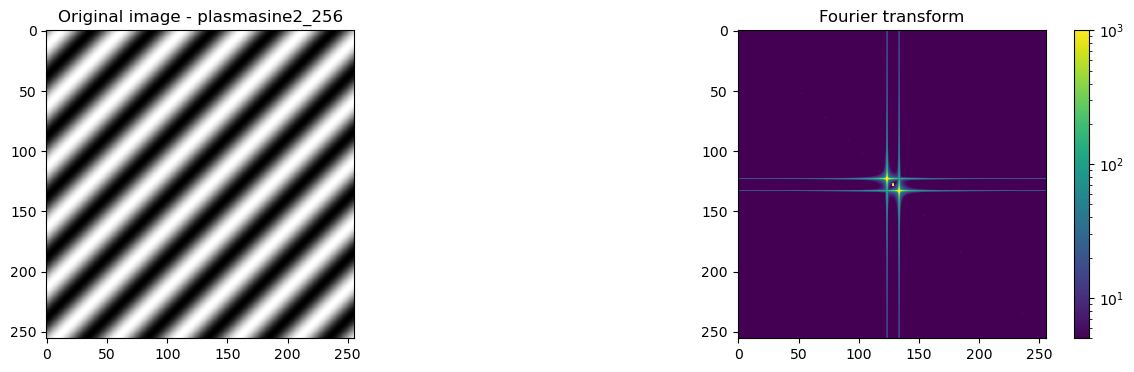

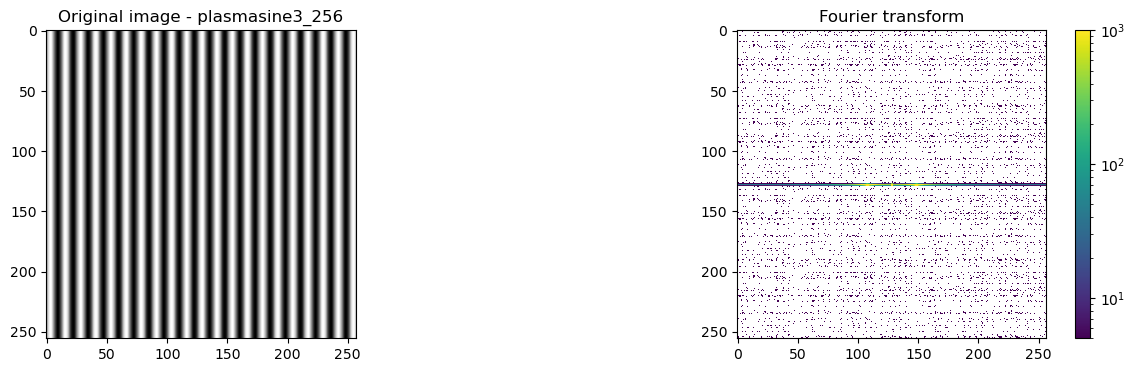

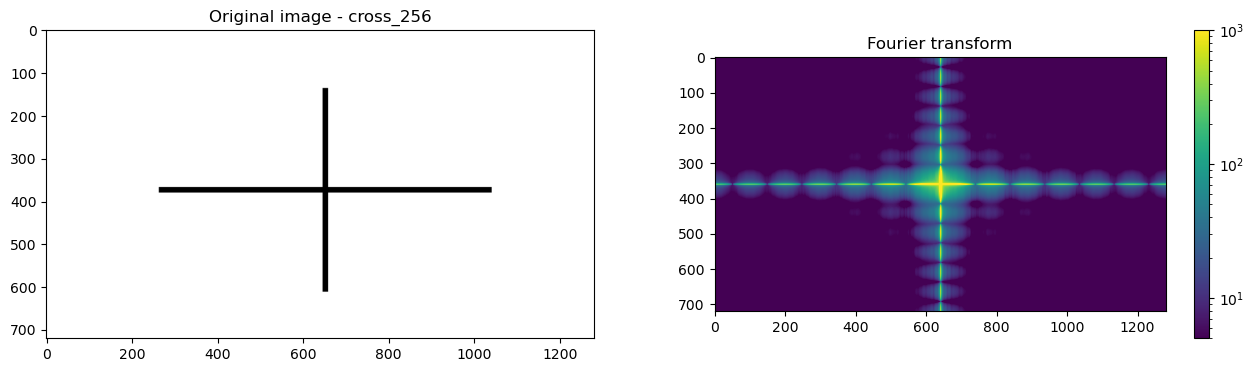

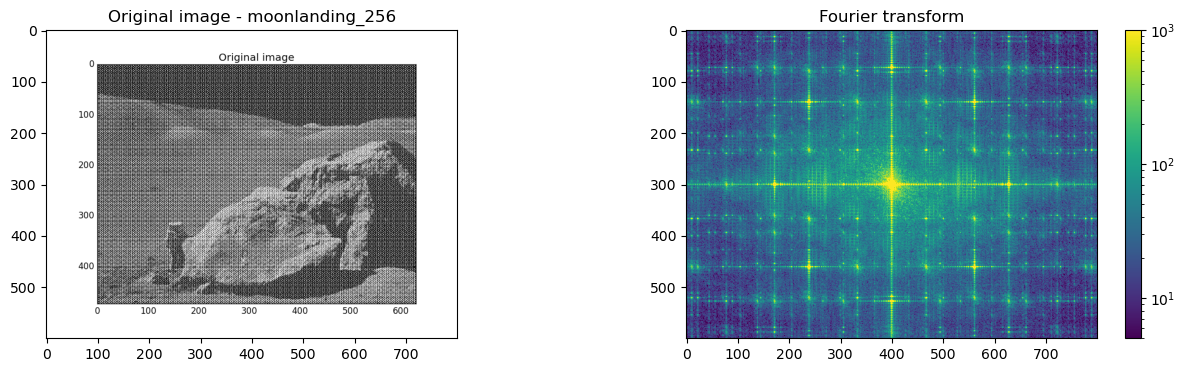

In [61]:
%matplotlib inline

from scipy import fftpack
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt

images = ["plasmasine_256","plasmasine2_256","plasmasine3_256", "cross_256", "moonlanding_256"]

for image in images:
    # Load image
    file = image + ".png"
    im = plt.imread('files/' + file).astype(float)

    # Calculate the FFT
    im_fft = fftpack.fft2(im)

    # Shift the FFT plot to the middle
    im_fft_center = fftpack.fftshift(im_fft)

    # Plot the images side by side 
    image_plot = plt.figure(figsize=[16.0, 4.0])

    # Plot the original image
    image_plot.add_subplot(1,2,1)

    plt.imshow(im, plt.cm.gray)
    plt.title('Original image - ' + image)

     # A logarithmic colormap
    image_plot.add_subplot(1,2,2)

    plt.imshow(np.abs(im_fft_center), norm=LogNorm(vmin=5, vmax=1000))
    
    # Plot the logarithmic colorbar
    plt.colorbar()
    plt.title('Fourier transform')

    plt.show(block=True) 

### Set the filter coefficient ###

In [62]:
from ipywidgets import FloatSlider, IntSlider, Image

slider = FloatSlider(min=0.0, max=1.0, step=0.01, description='filter _coefficient', readout_format='.2f')
# Show the slider
display(slider)


FloatSlider(value=0.0, description='filter _coefficient', max=1.0, step=0.01)

### Filter the image by applying a Low Pass Filter (LPF) in the FFT domain ###


Text(0.5, 1.0, 'Filtered Spectrum')

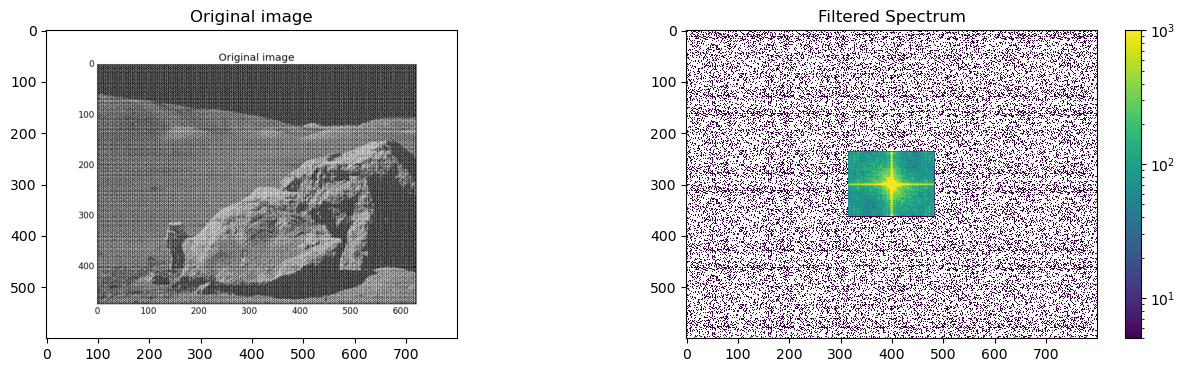

In [99]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
filter_coef = slider.value

# Shift the plot to middle
im_fft_center = fftpack.fftshift(im_fft)

# Apply the Low Pass Filter

height, width = np.shape(im_fft_center)
n_height = int((height / 2) * (1 - filter_coef))
n_width = int((width / 2) * (1 - filter_coef))
im_fft_center[:n_height] = 0
im_fft_center[-n_height - 1:] = 0
im_fft_center[n_height: -n_height, :n_width] = 0
im_fft_center[n_height: -n_height, -n_width - 1:] = 0

im_fft_lpf = im_fft_center

# Plot the images side by side
image_plot = plt.figure(figsize=[16.0, 4.0])

# Plot original image
image_plot.add_subplot(1,2,1)

plt.imshow(im, plt.cm.gray)

plt.title('Original image')

 # A logarithmic colormap
image_plot.add_subplot(1,2,2)

plt.imshow(np.abs(im_fft_lpf), norm=LogNorm(vmin=5, vmax=1000))
plt.colorbar()

plt.title('Filtered Spectrum')

### And now reconstruct the filtered image from the filtered FFT  ###


Text(0.5, 1.0, 'Reconstructed Image')

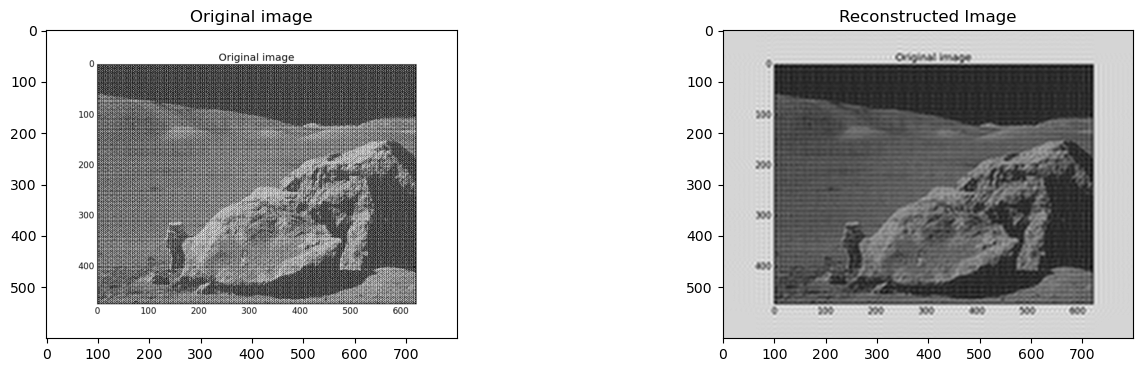

In [100]:

# - Reconstruct the denoised image from the filtered spectrum,  -
# - keep only the real part for display.

im_filtered = np.abs(fftpack.ifft2((im_fft_lpf)))

# Plot the images side by side 
image_plot = plt.figure(figsize=[16.0, 4.0])

# Plot original image
image_plot.add_subplot(1,2,1)

plt.imshow(im, plt.cm.gray)
plt.title('Original image')

 # Plot filtered image
image_plot.add_subplot(1,2,2)

plt.imshow(im_filtered, plt.cm.gray)
plt.title('Reconstructed Image')